**Import detector demand from mycity data**

In the folder input there are files from Landau intersections

In [2]:
folder = 'input/landau/LD-LSA1'

In [3]:
import os
import json

def find_json_files(directory, start_date, end_date):
    """
    Finds all JSON files in the given directory within a specified date range.

    Args:
        directory: The path to the directory to search.
        start_date: The start date in "YYYY-MM-DD" format (e.g., "2025-01-01").
        end_date: The end date in "YYYY-MM-DD" format (e.g., "2025-06-30").

    Returns:
        A list of file paths to the JSON files within the date range.
    """
    files = []
    for filename in os.listdir(directory):
        if filename.startswith("2025-") and filename.endswith(".json"):

            try:
               
                file_date = filename[5:-5]
                year = "2025"  # Add the year explicitly
                month, day = map(int, file_date.split("-"))
                file_date = f"{year}-{month:02}-{day:02}"  # Construct the full date string

                # Corrected comparison - moved the comparison to the if statement
                if start_date <= file_date <= end_date:
                    filepath = os.path.join(directory, filename)
                    # You can add code here to process the JSON file
                    # Example:
                    # with open(filepath, 'r') as f:
                    #     data = json.load(f)
                    #     print(f"File: {filepath}, Data: {data}")
                    files.append(filepath)
            except ValueError:
                print(f"Invalid date format in file: {filename}")
                pass
    return files

In [4]:
# Example Usage:
start_date = "2025-06-01"
end_date = "2025-06-24"

json_files = find_json_files(folder, start_date, end_date)

**Parse first file and understand the content**

In [11]:
import json
from collections import defaultdict

file = json_files[0] #first file for testing
with open(file, 'r') as f:  
    data = json.load(f)     

# detector_id -> total demand
demand_per_detector = defaultdict(int)

demandValues = []
for timeframe in data["timeFrames"]:
    demand = 0
    for detector in timeframe["detectors"]:
        detector_id = detector["id"]
        if detector_id == 7:
            demand = detector["reading"]["count"]["value"]
    demandValues.append(demand)

print(demandValues)


[4, 2, 5, 2, 3, 3, 0, 1, 1, 5, 2, 2, 2, 0, 1, 6, 3, 8, 8, 5, 7, 12, 5, 9, 8, 11, 12, 12, 11, 15, 22, 25, 29, 27, 23, 26, 39, 28, 21, 36, 33, 43, 39, 37, 40, 37, 30, 35, 32, 41, 40, 35, 40, 34, 28, 34, 28, 33, 25, 147, 41, 40, 46, 46, 39, 40, 36, 37, 32, 23, 28, 29, 29, 19, 28, 24, 19, 23, 14, 19, 10, 14, 14, 10, 6, 8, 5, 2, 2, 2, 3, 3, 2, 0, 2, 1]


**Show demand for Detector D11 / LSA1**

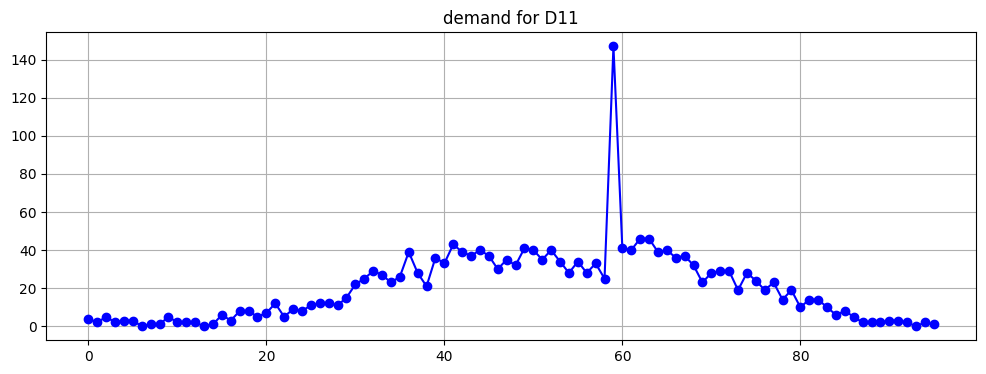

In [14]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(12, 4))  # Optional: Größe des Plots festlegen
plt.plot(demandValues, marker='o', linestyle='-', color='blue')  # Erstellt die Linie mit Markern
plt.title("demand for D11")  # Setzt den Titel
#plt.xlabel(x_label)  # Setzt die x-Achsenbeschriftung
#plt.ylabel(y_label)  # Setzt die y-Achsenbeschriftung
plt.grid(True)  # Zeigt ein Raster für bessere Lesbarkeit
plt.show()  # Zeigt den Chart an



**Read all vectortors from Detector D11 / LSA1 for all days**

**Train LSTM for different time horizons**